# **GRIP: The Sparks Foundation - Data Science & Business Analytics Intern**



# Done by - Jagannath Pal

# TASK-2 => Prediction using Unsupervised ML

● From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

● Use R or Python or perform this task

● Dataset : https://bit.ly/3kXTdox

● Sample Solution : https://bit.ly/3cGyP8j


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Reading the Data

In [2]:
df = pd.read_csv('/content/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Understanding the Data

In [3]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [4]:
df.shape

(150, 6)

In [5]:
df.size

900

In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [10]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [11]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

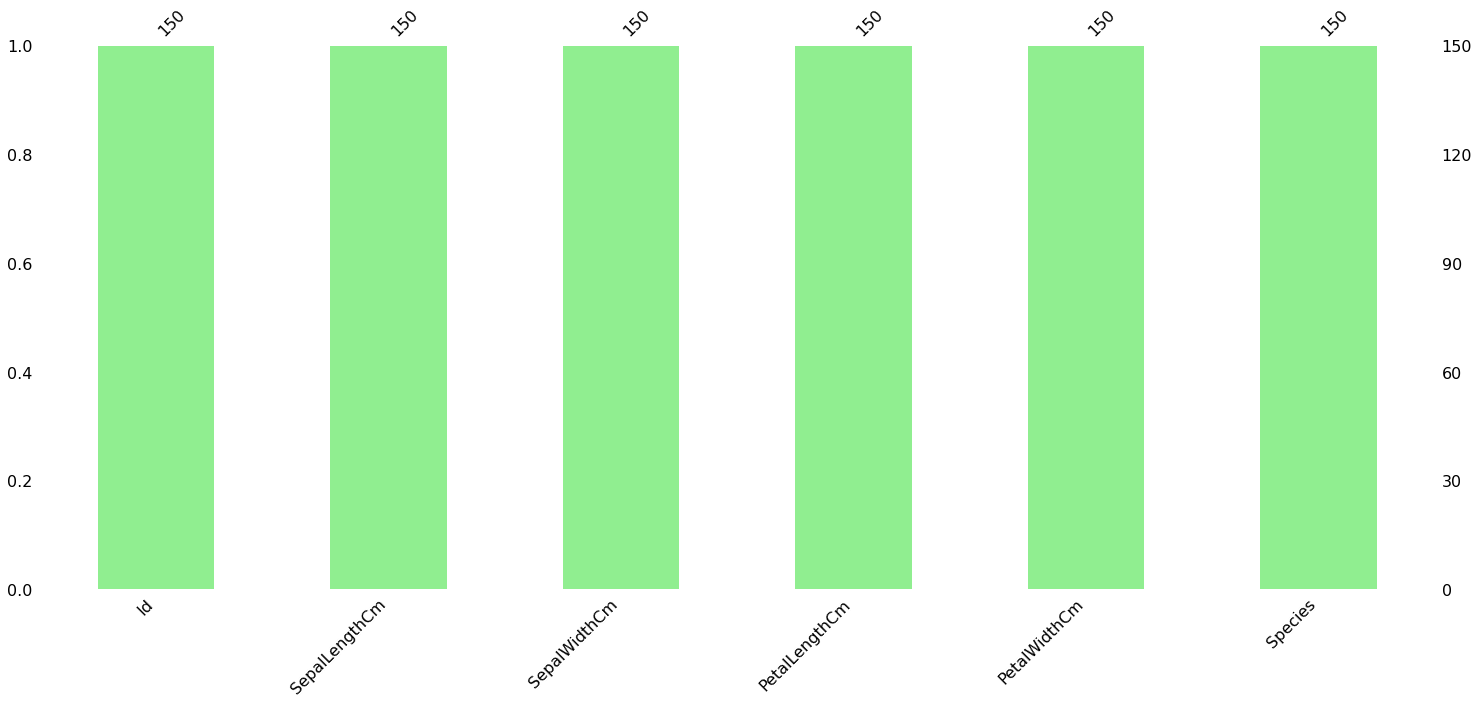

In [12]:
import missingno as no
no.bar(df,color='lightgreen')

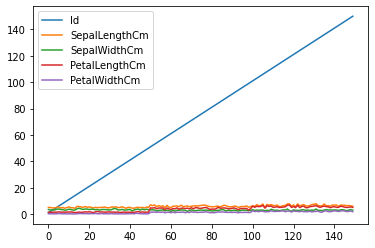

In [13]:
df.plot()

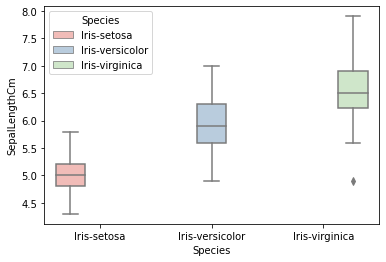

In [14]:
sns.boxplot(y=df['SepalLengthCm'],x=df.Species,hue='Species',data=df,palette='Pastel1')

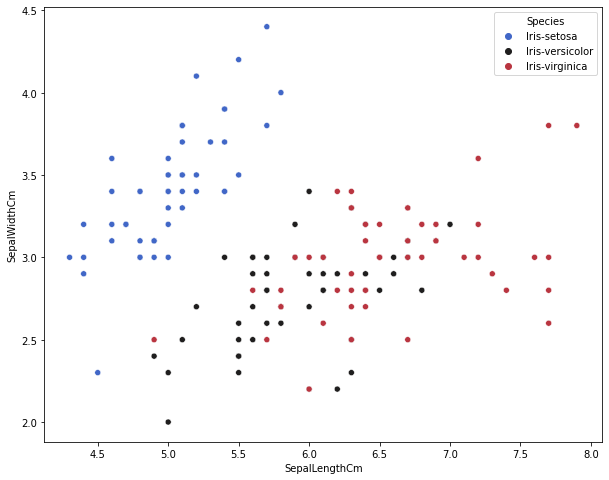

In [15]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df.SepalLengthCm , y=df['SepalWidthCm'], hue=df.Species, palette='icefire' )
plt.show()

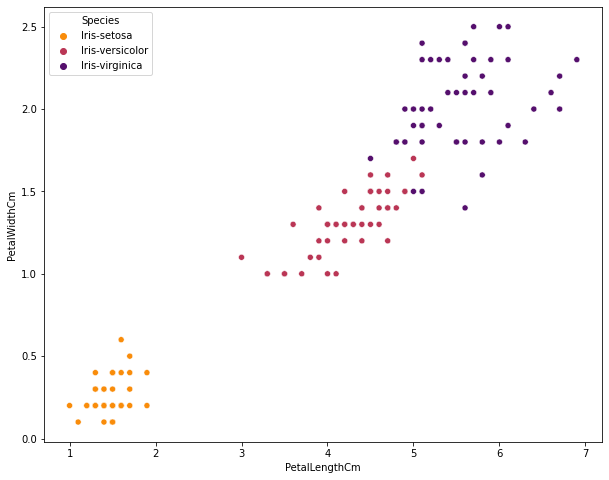

In [16]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df.PetalLengthCm , y=df['PetalWidthCm'], hue=df.Species, palette='inferno_r' )
plt.show()

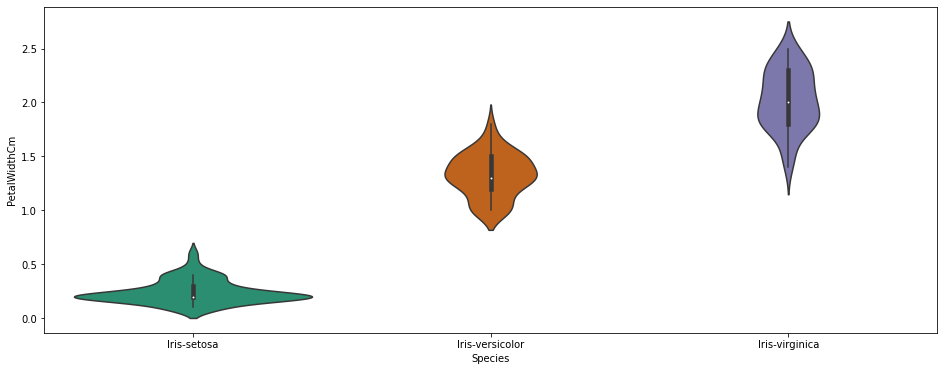

In [17]:
plt.figure(figsize=(16,6))
sns.violinplot(x=df.Species, y=df.PetalWidthCm, palette='Dark2')
plt.show()

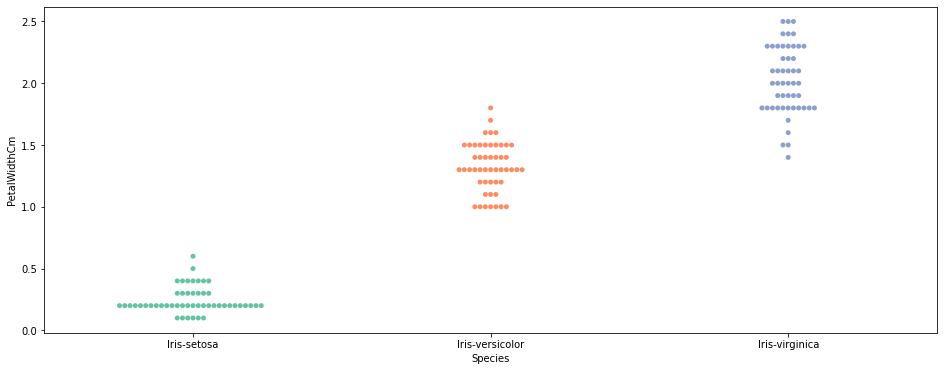

In [18]:
plt.figure(figsize=(16,6))
sns.swarmplot(x=df.Species, y=df.PetalWidthCm, palette='Set2')

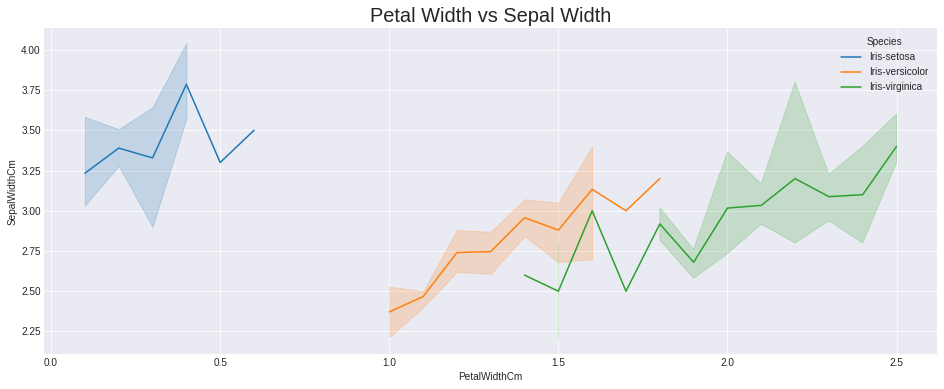

In [19]:
plt.figure(figsize=(16,6))
plt.style.use('seaborn-darkgrid')
sns.lineplot(x="PetalWidthCm" , y="SepalWidthCm" , hue="Species" , data=df)
plt.title('Petal Width vs Sepal Width', fontsize = 20)
plt.show()

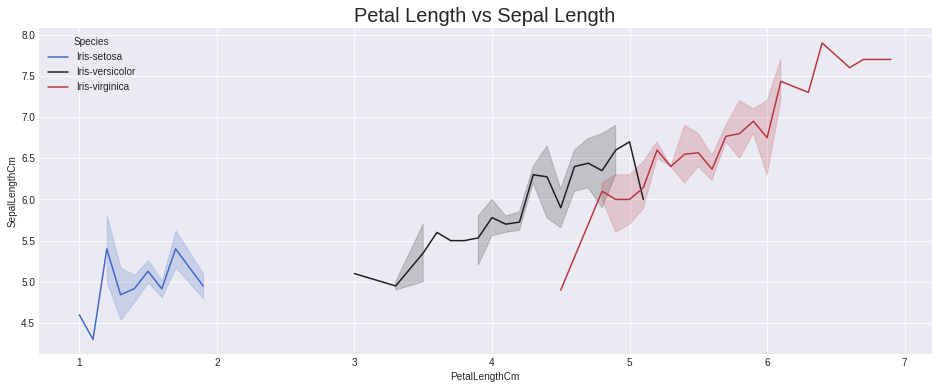

In [20]:
plt.figure(figsize=(16,6))
plt.style.use('seaborn-darkgrid')
sns.lineplot(x="PetalLengthCm" , y="SepalLengthCm" , hue="Species" , data=df, palette='icefire')
plt.title('Petal Length vs Sepal Length', fontsize = 20)
plt.show()

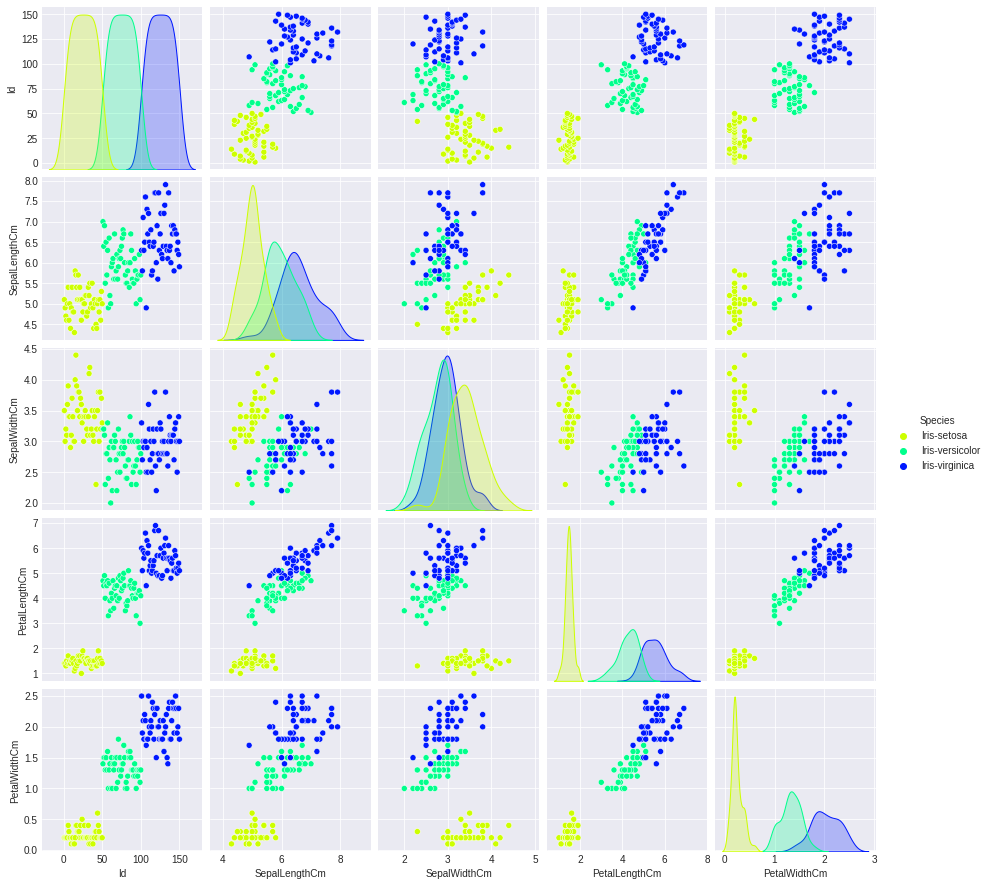

In [21]:
sns.pairplot(df, hue = 'Species', palette='gist_rainbow')
plt.show()

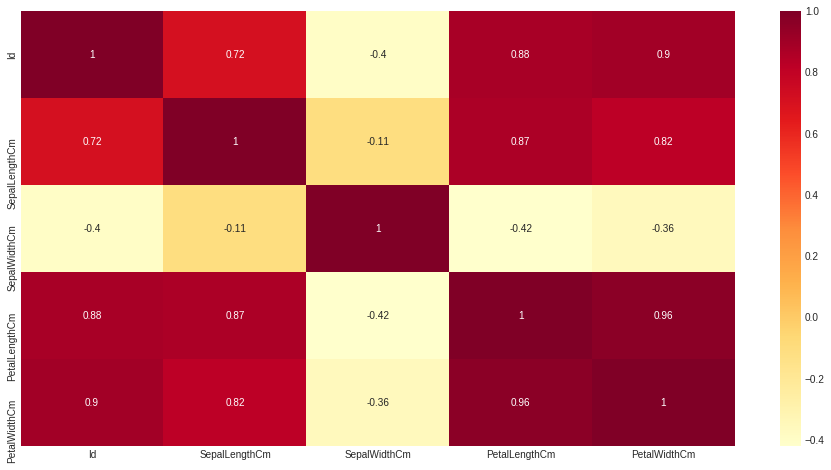

In [22]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), yticklabels='auto', annot=True, cmap='YlOrRd')
plt.show()

# Elbow Method

In [23]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [24]:
df = df.drop(['Id','Species'], axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
within_cluster_sum_of_sq = []
for i in range(1,15):
  kmeans = KMeans(n_clusters=i)
  kmeans = kmeans.fit(df)
  within_cluster_sum_of_sq.append(kmeans.inertia_)

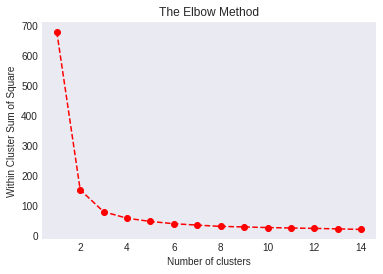

In [26]:
plt.plot(range(1,15), within_cluster_sum_of_sq,'go--', color = 'r')
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Square')
plt.title('The Elbow Method')
plt.show()

# KMeans Clustering

In [27]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=5)
pred = kmeans.fit_predict(df)

In [28]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

# Visualizing the dataset in the form of different Clusters


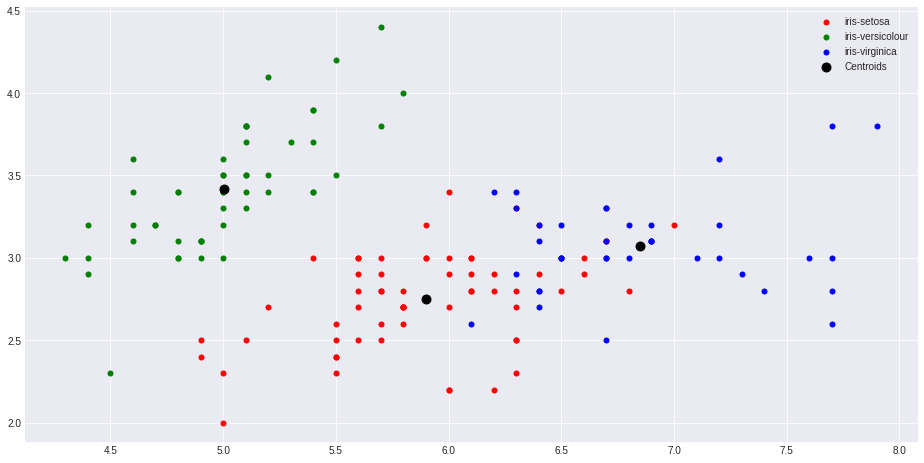

In [29]:
plt.figure(figsize=(16,8))

x = df.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[pred == 0, 0], x[pred == 0, 1], s=25, c= 'red', label = 'iris-setosa')
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], s=25, c= 'green', label = 'iris-versicolour')
plt.scatter(x[pred == 2, 0], x[pred == 2, 1], s=25, c= 'blue', label = 'iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=80, color = '#000000', label = 'Centroids')
plt.legend()
plt.show()

# Saving the Model

In [30]:
import pickle
pickle.dump(kmeans, open("model.pkl","wb"))